In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import bifacial_radiance
bifacial_radiance.__version__

'0.4.1+107.g29a47a1.dirty'

In [100]:
testfolder = testfolder = str(Path().resolve().parent.parent / 'bifacial_radiance' / 'SouthPole')
if not os.path.exists(testfolder):
    os.makedirs(testfolder)


path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\SouthPole
Loading albedo, 1 value(s), 0.620 avg
1 nonzero albedo values.


In [43]:
def saveSAM_SRRLWeatherFile(srrl15, savefile='Bifacial_SAMfileAll2019_15.csv', includeminute = True):
    """
    Saves a dataframe with weather data from SRRL on SAM-friendly format.

    INPUT:
    data
    savefile
    includeminute  -- especially for hourly data, if SAM input does not have Minutes, it assuems it's TMY3 format and 
                      calculates the sun position 30 minutes prior to the hour (i.e. 12 timestamp means sun position at 11:30)
                      If minutes are included, it will calculate the sun position at the time of the timestamp (12:00 at 12:00)
                      Include minutes if resolution of data is not hourly duh. (but it will calculate at the timestamp)
                      
    Headers expected by SAM:
    ************************* 
    # Source	Location ID	City	State	Country	Latitude	Longitude	Time Zone	Elevation		

    Column names
    *************
    # Year	Month	Day	Hour	Minute	Wspd	Tdry	DHI	DNI	GHI	Albedo

    OR
    # Year	Month	Day	Hour	Wspd	Tdry	DHI	DNI	GHI	Albedo

    """

    import pandas as pd

    header = "Source,Location ID,City,State,Country,Latitude,Longitude,Time Zone,Elevation,,,,,,,,,,\n" + \
            "Measured,724666,DENVER/CENTENNIAL [GOLDEN - NREL],CO,USA,39.742,-105.179,-7,1829,,,,,,,,,,\n"

    if includeminute:
        savedata = pd.DataFrame({'Year':srrl15.index.year, 'Month':srrl15.index.month, 'Day':srrl15.index.day,
                                 'Hour':srrl15.index.hour, 'Minute':srrl15.index.minute,
                                 'Wspd':srrl15['Avg Wind Speed @ 6ft [m/s]'],
                                 'Tdry':srrl15['Tower Dry Bulb Temp [deg C]'],
                                 'DHI':srrl15['Diffuse 8-48 (vent) [W/m^2]'],
                                 'DNI':srrl15['Direct CHP1-1 [W/m^2]'],
                                 'GHI':srrl15['Global CMP22 (vent/cor) [W/m^2]'],
                                 'Albedo':srrl15['Albedo (CMP11)']
                                 })
    else:
         savedata = pd.DataFrame({'Year':srrl15.index.year, 'Month':srrl15.index.month, 'Day':srrl15.index.day,
                                 'Hour':srrl15.index.hour,
                                 'Wspd':srrl15['Avg Wind Speed @ 6ft [m/s]'],
                                 'Tdry':srrl15['Tower Dry Bulb Temp [deg C]'],
                                 'DHI':srrl15['Diffuse 8-48 (vent) [W/m^2]'],
                                 'DNI':srrl15['Direct CHP1-1 [W/m^2]'],
                                 'GHI':srrl15['Global CMP22 (vent/cor) [W/m^2]'],
                                 'Albedo':srrl15['Albedo (CMP11)']
                                 })
    with open(savefile, 'w', newline='') as ict:
        # Write the header lines, including the index variable for
        # the last one if you're letting Pandas produce that for you.
        # (see above).
        for line in header:
            ict.write(line)

        savedata.to_csv(ict, index=False)

      

def new_save_TMY3(srrl15, savefile='Bifacial_TMYfileAll2019_15.csv', includeTrackerData=False):
    """
    NEW Routine to save TMY3 , assuming the columns Date and Time already exist and are in the right
    1-24 hour format. (this can be done previous to submitting to this function by
    reading a real CSV and joining those columns)
    
    Saves a dataframe with weathe data from SRRL in TMY3 data format.
    
    if includeTrackerData is True, it will also save the tracker data column.
    

    Headers expected by TMY3:
    ************************* 
    # Location ID	City	State	Time Zone	Latitude	Longitude	Elevation

    Column names
    *************
    # Date (MM/DD/YYYY)		Time (HH:MM)	GHI (W/m^2))	DNI (W/m^2))	DHI (W/m^2)		Wspd (m/s)	
    Dry-bulb (C)	Alb (unitless)	

    """

    import pandas as pd

    header = "724666, ANTARCTICA, SP, -0, -89.99,50.0, 2.3\n"

    savedata = pd.DataFrame({'Date (MM/DD/YYYY)':srrl15['Date (MM/DD/YYYY)'],
                             'Time (HH:MM)':srrl15['Time (HH:MM)'],
                             'Wspd (m/s)':srrl15['windspeed'],
                             'Dry-bulb (C)':srrl15['Tamb'],
                             'DHI (W/m^2)':srrl15['DHI'],
                             'DNI (W/m^2)':srrl15['DNI'],
                             'GHI (W/m^2)':srrl15['GHI'],
                             'Alb (unitless)':srrl15['albedo']})

    if includeTrackerData:
        savedata['Tracker Angle (degrees)'] = srrl15['Tracker Angle (degrees)']

    with open(savefile, 'w', newline='') as ict:
        # Write the header lines, including the index variable for
        # the last one if you're letting Pandas produce that for you.
        # (see above).
        for line in header:
            ict.write(line)

        savedata.to_csv(ict, index=False)

In [12]:
real_tmy=r'C:\Users\sayala\Documents\Github\bifacialvf\bifacialvf\data\724010TYA.CSV'
real_tmy = pd.read_csv(real_tmy, skiprows = [0])
real_tmy = real_tmy.reset_index()
real_tmy.head(2)

,index,Date (MM/DD/YYYY),Time (HH:MM),ETR (W/m^2),ETRN (W/m^2),GHI (W/m^2),GHI source,GHI uncert (%),DNI (W/m^2),DNI source,...,Alb (unitless),Alb source,Alb uncert (code),Lprecip depth (mm),Lprecip quantity (hr),Lprecip source,Lprecip uncert (code),PresWth (METAR code),PresWth source,PresWth uncert (code)
0,0,01/01/1987,01:00,0,0,0,1,0,0,1,...,0.0,?,0,0,1,D,9,0,C,8
1,1,01/01/1987,02:00,0,0,0,1,0,0,1,...,0.0,?,0,0,1,D,9,0,C,8


In [16]:
rawfile = r'C:\Users\sayala\Desktop\SOUTHPOLE\South_Pole.xlsx'
data = pd.read_excel(rawfile)
data.head(2)

,datetime,DNI,DHI,GHI,windir,windspeed,rel_hum,albedo
0,2021-01-01 00:00:00,1046.269492,74.516949,466.494915,74.247458,2.508475,65.571186,0.837950
1,2021-01-01 01:00:00,1042.085000,74.356667,467.708333,74.088333,2.711667,65.161667,0.845178


In [33]:
data['Date (MM/DD/YYYY)'] = real_tmy['Date (MM/DD/YYYY)']
data['Time (HH:MM)'] = real_tmy['Time (HH:MM)']
data['Date (MM/DD/YYYY)']=data['Date (MM/DD/YYYY)'].map(lambda x: str(x)[:-4])+'2021'
data['Tamb'] = 0
data.head(2)

,datetime,DNI,DHI,GHI,windir,windspeed,rel_hum,albedo,Date (MM/DD/YYYY),Time (HH:MM),Tamb
0,2021-01-01 00:00:00,1046.269492,74.516949,466.494915,74.247458,2.508475,65.571186,0.837950,01/01/2021,01:00,0
1,2021-01-01 01:00:00,1042.085000,74.356667,467.708333,74.088333,2.711667,65.161667,0.845178,01/01/2021,02:00,0


In [44]:
new_save_TMY3(data, savefile=r'C:\Users\sayala\Desktop\SOUTHPOLE\SoutPole_TMY3.csv')

8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos


C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1206: RuntimeWarning: invalid value encountered in remainder
  H0 = np.degrees(np.arccos(cos_arg)) % 180
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1217: RuntimeWarning: invalid value encountered in remainder
  m[1] = m[1] % 1
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1218: RuntimeWarning: invalid value encountered in remainder
  m[2] = m[2] % 1
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1235: RuntimeWarning: invalid value encountered in remainder
  Hp = (vs + lon - alpha_prime) % 360


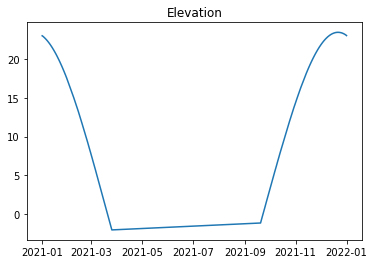

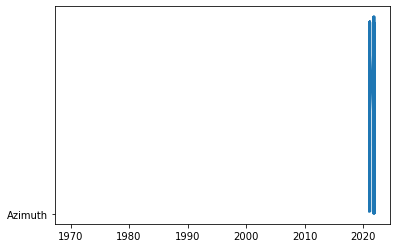

In [103]:
import matplotlib.pyplot as plt

plt.plot(metdata.solpos.elevation)
plt.title('Elevation')
plt.figure()
plt.plot(metdata.solpos.azimuth)
plt.plot('Azimuth')
#apparent_zenith	zenith	apparent_elevation	elevation	azimuth


# Round Setup

In [109]:

demo = bifacial_radiance.RadianceObj("SouthPole", path = testfolder)  # Create a RadianceObj 'object'
demo.setGround(0.62)
metdata = demo.readWeatherFile(r'C:\Users\sayala\Desktop\SOUTHPOLE\SoutPole_TMY3.csv', coerce_year=2021) 
timestamp = metdata.datetime.index(pd.to_datetime('2021-12-24 13:0:0 -0'))
demo.gendaylit(timestamp) 

# For sanity check, we are creating the same module but with different names for each orientation.
numpanels=1 
ygap = 0.01 # m Spacing between modules on each shed.
y=2   # m. module size, one side
x=1   # m. module size, other side. for landscape, x > y
mymodule = demo.makeModule(name='module',y=y,x=x, numpanels=numpanels, ygap=ygap)

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\SouthPole
Loading albedo, 1 value(s), 0.620 avg
1 nonzero albedo values.
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: module
Module module updated in module.json
Pre-existing .rad file objects\module.rad will be overwritten



C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1206: RuntimeWarning: invalid value encountered in remainder
  H0 = np.degrees(np.arccos(cos_arg)) % 180
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1217: RuntimeWarning: invalid value encountered in remainder
  m[1] = m[1] % 1
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1218: RuntimeWarning: invalid value encountered in remainder
  m[2] = m[2] % 1
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1235: RuntimeWarning: invalid value encountered in remainder
  Hp = (vs + lon - alpha_prime) % 360


In [106]:
Rays = 15
pitch = 5
innerR = 5
nMods = 1
nRows = 10
clearance_height = 0.5

sceneObjDict = {}
for rr in range(0, Rays):
    ray_azm = 0 + 360*rr/Rays
    centerpitch = innerR + pitch*(nRows-1)/2         # This might be off by half a pitch, check for even and odd nMods  
    azm = ray_azm - 90  # Radiance and Pvlib use N = 0, so converting
    centerpitch_x = centerpitch*np.cos(np.radians(azm))
    centerpitch_y = centerpitch*np.sin(np.radians(azm))*-1
    sceneDict = {'tilt':90,'pitch':pitch,'clearance_height':clearance_height,'azimuth':ray_azm, 'nMods': 1, 'nRows': nRows, 
             'appendRadfile':True, 'originx': centerpitch_x, 'originy': centerpitch_y} 
    sceneObjDict['sceneObj'+str(rr)] = demo.makeScene(mymodule, sceneDict)  

In [107]:
octfile = demo.makeOct(demo.getfilelist()) 

Created SouthPole.oct


In [108]:
!rvu -vf views\front.vp -e .01 -pe 0.3 -vp 0 -27.5 40 -vd 0 0.7071 -0.7071 SouthPole.oct

# Square setup

In [162]:

demo = bifacial_radiance.RadianceObj("SouthPole", path = testfolder)  # Create a RadianceObj 'object'
demo.setGround(0.7)
metdata = demo.readWeatherFile(r'C:\Users\sayala\Desktop\SOUTHPOLE\SoutPole_TMY3.csv', coerce_year=2021) 
timestamp = metdata.datetime.index(pd.to_datetime('2021-12-24 13:0:0 -0'))
demo.gendaylit(timestamp) 

# For sanity check, we are creating the same module but with different names for each orientation.
numpanels=1 
ygap = 0.01 # m Spacing between modules on each shed.
y=2   # m. module size, one side
x=1   # m. module size, other side. for landscape, x > y
xgap = 2
mymodule = demo.makeModule(name='module',y=y,x=x, numpanels=numpanels, xgap=xgap, ygap=ygap)

path = C:\Users\sayala\Documents\GitHub\bifacial_radiance\bifacial_radiance\SouthPole
Loading albedo, 1 value(s), 0.700 avg
1 nonzero albedo values.
8760 line in WeatherFile. Assuming this is a standard hourly WeatherFile for the year for purposes of saving Gencumulativesky temporary weather files in EPW folder.
Coercing year to 2021
Saving file EPWs\metdata_temp.csv, # points: 8760
Calculating Sun position for Metdata that is right-labeled  with a delta of -30 mins. i.e. 12 is 11:30 sunpos

Module Name: module
Module module updated in module.json
Pre-existing .rad file objects\module.rad will be overwritten



C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1206: RuntimeWarning: invalid value encountered in remainder
  H0 = np.degrees(np.arccos(cos_arg)) % 180
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1217: RuntimeWarning: invalid value encountered in remainder
  m[1] = m[1] % 1
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1218: RuntimeWarning: invalid value encountered in remainder
  m[2] = m[2] % 1
C:\Users\sayala\Anaconda3\lib\site-packages\pvlib\spa.py:1235: RuntimeWarning: invalid value encountered in remainder
  Hp = (vs + lon - alpha_prime) % 360


In [163]:
nPanels = 2400
print("System Size ", nPanels*.380, "kW")
nMods = 20 # 7         20
nRows = 30 # 11        30
pitch = 4
xgap = 3
z = 0
x = 1
CO = 47          # Center Offset space
goal = 240                   
print("Mega Array Side: ", nMods*z + (nRows-1)*pitch + nMods*x + (nMods-1) * xgap+ CO,  "m")

System Size  912.0 kW
Mega Array Side:  240 m


In [164]:
Rays = 4
clearance_height = 0.5

sceneObjDict = {}
for rr in range(0, Rays):
    ray_azm = 45 + 360*rr/Rays
    sazm = ray_azm - 45
    centerpitch = innerR + pitch*(nRows-1)/2         # This might be off by half a pitch, check for even and odd nMods  
    azm = ray_azm - 90  # Radiance and Pvlib use N = 0, so converting
    centerpitch_x = centerpitch*np.cos(np.radians(azm))
    centerpitch_y = centerpitch*np.sin(np.radians(azm))*-1
    sceneDict = {'tilt':90,'pitch':pitch,'clearance_height':clearance_height,'azimuth':sazm, 'nMods': nMods, 'nRows': nRows, 
             'appendRadfile':True, 'originx': centerpitch_x, 'originy': centerpitch_y} 
    sceneObjDict['sceneObj'+str(rr)] = demo.makeScene(mymodule, sceneDict)  

In [165]:
octfile = demo.makeOct(demo.getfilelist()) 

Created SouthPole.oct


In [166]:
!rvu -vf views\front.vp -e .01 -pe 0.3 -vp 5 -50 50 -vd 0 0.7071 -0.7071 SouthPole.oct

In [131]:
demo.genCumSky()
octfile = demo.makeOct(demo.getfilelist()) 

Loaded  EPWs\metdata_temp.csv
message: There were 4112 sun up hours in this climate file
Total Ibh/Lbh: 0.000000
Created SouthPole.oct


In [132]:
analysis = bifacial_radiance.AnalysisObj(octfile, demo.basename)  


In [133]:
# Make a color render and falsecolor image of the scene.
analysis.makeImage('side.vp')
analysis.makeFalseColor('side.vp')

Generating visible render of scene
Generating scene in WM-2. This may take some time.
Saving scene in false color


### Analysis

In [ ]:
demo.gendaylit(timestamp) 
demo.makeOct()

for obj in sceneObjDict:
    for mm in range(1, nMods+1):
        for rr in range(1, nRows+1):
            frontscan, backscan = analysis.moduleAnalysis(sceneObjDict[obj], sensorsy=4, sensorsx = 4, modWanted = mm, rowWanted = rr)
            frontdict, backdict = analysis.analysis(octfile, obj, frontscan, backscan)  # compare the back vs front irradiance  

In [ ]:
bifaciality = 0.7

filetitle = 'irr_sceneObj0_Mod_1_Row_3_Row3_Module1.csv'
for obj in sceneObjDict:
    for mm in range(1, nMods+1):
        for rr in range(1, nRows+1):
            filetitle = 'results\irr_'+obj+'_Row'+rr+'_Module'+mm+'.csv'
            data=load.read1Result(filetitle)
            Gpoa = data['Wm2Front'].mean() + data['Wm2Back'].mean()*bifaciality


In [ ]:
sensorsy=4  # 1 per module. consider increasing the number but be careful with sensors in the space between modules.
analysis = bifacial_radiance.AnalysisObj(octfile, demo.basename)  
frontscan, backscan = analysis.moduleAnalysis(sceneObj1, sensorsy=sensorsy)
frontdict, backdict = analysis.analysis(octfile, "EastFacingShed", frontscan, backscan)  # compare the back vs front irradiance  

frontscan, backscan = analysis.moduleAnalysis(sceneObj2, sensorsy=sensorsy )
frontdict2, backdict2 = analysis.analysis(octfile, "WestFacingShed", frontscan, backscan)  # compare the back vs front irradiance  
